In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

In [ ]:
from datasets import load_dataset

ds = load_dataset("Artificio/WikiArt_mini_demos")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/858 [00:00<?, ?B/s]

(…)-00000-of-00001-19ad8e78abf4267b.parquet:   0%|          | 0.00/445M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
ds.shape

{'train': (10000, 12)}

In [ ]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['title', 'artist', 'date', 'genre', 'style', 'description', 'filename', 'image', 'resnet50_non_robust_features_2048', 'resnet50_robust_features_2048', 'resnet50_robust_feats', 'resnet50_non_robust_feats'],
        num_rows: 10000
    })
})


In [ ]:
# Access the 'train' split
train_ds = ds['train']

# Get all the style values
styles = train_ds['style']
# styles = list(set(styles))
# styles

In [ ]:
from collections import Counter

# Count the occurrences of each style
style_counts = Counter(styles)

# Order the styles by count in descending order using most_common()
ordered_styles = style_counts.most_common()

# Print the count for each style, ordered by frequency (descending)
print("Number of pictures for each style (ordered by count descending):")
for style, count in ordered_styles:
    print(f"{style}: {count}")

# Get a list of styles and their counts, ordered by count (descending)
ordered_style_count_list = list(ordered_styles)
print("\nList of styles and their counts (ordered by count descending):")
print(ordered_style_count_list)

Number of pictures for each style (ordered by count descending):
Realism: 1013
Impressionism: 999
Romanticism: 914
Expressionism: 721
Post-Impressionism: 534
Art Nouveau (Modern): 496
Baroque: 480
Surrealism: 422
Symbolism: 368
Rococo: 262
Northern Renaissance: 257
Naïve Art (Primitivism): 237
Abstract Expressionism: 206
Cubism: 180
Neoclassicism: 168
Magic Realism: 131
Early Renaissance: 129
Mannerism (Late Renaissance): 128
Ukiyo-e: 118
High Renaissance: 107
Art Informel: 105
Academicism: 98
Color Field Painting: 94
None: 91
Abstract Art: 89
Lyrical Abstraction: 76
Pop Art: 73
Fauvism: 67
Minimalism: 60
Op Art: 54
Concretism: 53
Art Deco: 52
Precisionism: 48
Tachisme: 47
Pointillism: 45
Luminism: 45
Orientalism: 44
Ink and wash painting: 40
Divisionism: 38
Neo-Expressionism: 37
Neo-Romanticism: 37
Contemporary Realism: 37
Hard Edge Painting: 36
American Realism: 35
Regionalism: 33
Proto Renaissance: 31
Futurism: 30
Tonalism: 28
Shin-hanga: 26
New Realism: 25
Orphism: 23
Social Realis

In [ ]:
from datasets import load_dataset, DatasetDict, Dataset

# Load the dataset
# ds = load_dataset("Artificio/WikiArt_mini_demos")

# Define the styles you want to keep
target_styles = [
    "Realism",
    "Impressionism",
    "Romanticism",
    "Expressionism",
    "Post-Impressionism",
    "Art Nouveau (Modern)",
    "Baroque",
    "Surrealism",
    "Symbolism",
    "Rococo",
    "Northern Renaissance",
    "Naïve Art (Primitivism)",
    "Abstract Expressionism",
    "Cubism",
    "Neoclassicism",
    "Magic Realism",
    "Early Renaissance",
    "Mannerism (Late Renaissance)",
    "Ukiyo-e",
    "High Renaissance",
    "Art Informel",
    "Academicism",
    "Color Field Painting",
]

def filter_by_style(example):
    return example['style'] in target_styles

# Filter the training split
filtered_train_ds = ds['train'].filter(filter_by_style)

# If there are other splits (e.g., 'validation', 'test'), you can filter them similarly:
filtered_ds = DatasetDict({
    'train': filtered_train_ds,
})

# Print the information of the filtered dataset
print(filtered_ds)

# You can also check the counts of each style in the filtered dataset
from collections import Counter
filtered_styles = filtered_train_ds['style']
filtered_style_counts = Counter(filtered_styles)
print("\nCounts of styles in the filtered training dataset:")
for style, count in filtered_style_counts.items():
    print(f"{style}: {count}")

Filter:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['title', 'artist', 'date', 'genre', 'style', 'description', 'filename', 'image', 'resnet50_non_robust_features_2048', 'resnet50_robust_features_2048', 'resnet50_robust_feats', 'resnet50_non_robust_feats'],
        num_rows: 8167
    })
})

Counts of styles in the filtered training dataset:
Surrealism: 422
Expressionism: 721
Art Nouveau (Modern): 496
Symbolism: 368
Realism: 1013
Early Renaissance: 129
Romanticism: 914
Post-Impressionism: 534
Impressionism: 999
Baroque: 480
Naïve Art (Primitivism): 237
Abstract Expressionism: 206
Art Informel: 105
Neoclassicism: 168
Cubism: 180
Mannerism (Late Renaissance): 128
Northern Renaissance: 257
High Renaissance: 107
Academicism: 98
Ukiyo-e: 118
Rococo: 262
Magic Realism: 131
Color Field Painting: 94


In [ ]:
save_path = '/content/drive/MyDrive/Multi_Modal/Project/input_demo'

In [ ]:
filtered_ds.save_to_disk(save_path)

print(f"Dataset saved to: {save_path}")

Saving the dataset (0/1 shards):   0%|          | 0/8167 [00:00<?, ? examples/s]

Dataset saved to: /content/drive/MyDrive/Multi_Modal/Project/input_demo


### Load dataset

In [ ]:
from datasets import load_from_disk
# Load the dataset from the saved path
ds = load_from_disk(save_path)

print(ds)

DatasetDict({
    train: Dataset({
        features: ['title', 'artist', 'date', 'genre', 'style', 'description', 'filename', 'image', 'resnet50_non_robust_features_2048', 'resnet50_robust_features_2048', 'resnet50_robust_feats', 'resnet50_non_robust_feats'],
        num_rows: 8167
    })
})


In [ ]:
# Check the first 5 examples of the 'train' split
print("\nFirst 5 examples of the 'train' split:")
for i in range(min(5, len(ds['train']))):
    print(f"Example {i}: {ds['train'][i]}")


First 5 examples of the 'train' split:
Example 0: {'title': 'O Diabo, a Paraquedista, Etc', 'artist': 'Rene Bertholo', 'date': '1997.0', 'genre': 'figurative', 'style': 'Surrealism', 'description': 'Rene Bertholo / O Diabo, a Paraquedista, Etc / Surrealism / figurative / 1997.0', 'filename': '100000.jpg', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7BA7646B4290>, 'resnet50_non_robust_features_2048': [0.09950044751167297, 0.01010294072329998, 0.10626640170812607, 0.09018800407648087, 0.11729815602302551, 0.019595716148614883, 0.3756974935531616, 0.09461639821529388, 0.0029561363626271486, 0.10248256474733353, 0.1655932366847992, 0.016657458618283272, 0.1060972735285759, 0.12380041927099228, 0.16344130039215088, 0.012812095694243908, 0.13708627223968506, 0.6947997808456421, 0.130748450756073, 0.23798999190330505, 0.01671815663576126, 0.15836894512176514, 0.45914357900619507, 0.019605519250035286, 0.6690155863761902, 0.20893484354019165, 0.089891105890274


First 5 images of the 'train' split:


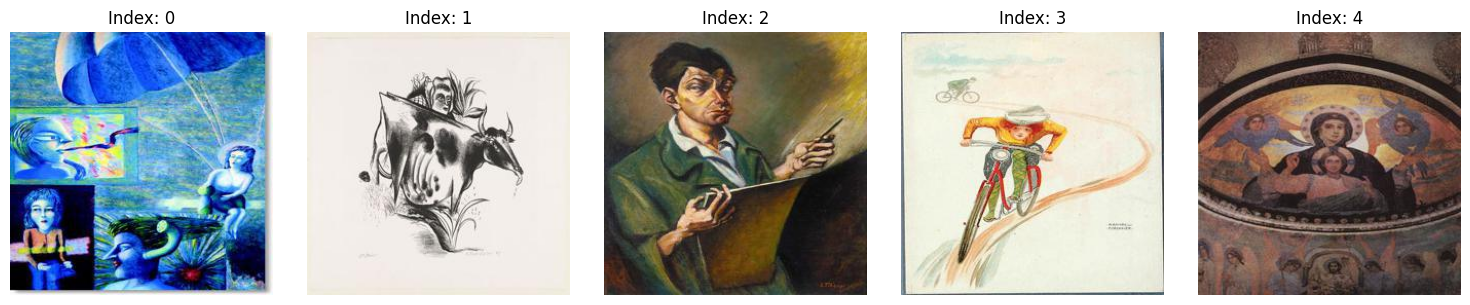

In [ ]:
import matplotlib.pyplot as plt

# Check the first 5 images of the 'train' split
print("\nFirst 5 images of the 'train' split:")
fig, axes = plt.subplots(1, min(5, len(ds['train'])), figsize=(15, 3))
for i in range(min(5, len(ds['train']))):
    example = ds['train'][i]
    image = example['image']  # Assuming 'image' is the key for the PIL Image object
    if isinstance(image, bytes):
        from PIL import Image as PImage
        import io
        image = PImage.open(io.BytesIO(image))
    axes[i].imshow(image)
    axes[i].set_title(f"Index: {i}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### Full Data

In [ ]:
from datasets import load_dataset

ds = load_dataset("Artificio/WikiArt")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/663 [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

(…)-00000-of-00004-3c65976b59bc0ab4.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

(…)-00001-of-00004-441bd829579dead0.parquet:   0%|          | 0.00/428M [00:00<?, ?B/s]

(…)-00002-of-00004-7b0bbb36fb350222.parquet:   0%|          | 0.00/429M [00:00<?, ?B/s]

(…)-00003-of-00004-971fec8ddd44fece.parquet:   0%|          | 0.00/429M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/103250 [00:00<?, ? examples/s]

In [ ]:
ds.shape

{'train': (103250, 9)}

In [ ]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['title', 'artist', 'date', 'genre', 'style', 'description', 'filename', 'image', 'embeddings_pca512'],
        num_rows: 103250
    })
})


In [ ]:
# Access the 'train' split
train_ds = ds['train']

# Get all the style values
styles = train_ds['style']

from collections import Counter

# Count the occurrences of each style
style_counts = Counter(styles)

# Order the styles by count in descending order using most_common()
ordered_styles = style_counts.most_common()

# Print the count for each style, ordered by frequency (descending)
print("Number of pictures for each style (ordered by count descending):")
for style, count in ordered_styles:
    print(f"{style}: {count}")

# Get a list of styles and their counts, ordered by count (descending)
ordered_style_count_list = list(ordered_styles)
print("\nList of styles and their counts (ordered by count descending):")
print(ordered_style_count_list)

Number of pictures for each style (ordered by count descending):
Impressionism: 10643
Realism: 10523
Romanticism: 9285
Expressionism: 7013
Post-Impressionism: 5778
Art Nouveau (Modern): 4899
Baroque: 4400
Surrealism: 4167
Symbolism: 3476
Rococo: 2733
Northern Renaissance: 2379
Naïve Art (Primitivism): 2295
Abstract Expressionism: 2074
Neoclassicism: 2038
Cubism: 1747
Ukiyo-e: 1426
Early Renaissance: 1351
Mannerism (Late Renaissance): 1342
High Renaissance: 1314
Art Informel: 1267
Magic Realism: 1002
None: 986
Abstract Art: 979
Academicism: 972
Color Field Painting: 910
Pop Art: 791
Fauvism: 731
Lyrical Abstraction: 670
Art Deco: 644
Concretism: 581
Neo-Romanticism: 566
Ink and wash painting: 545
Op Art: 528
Pointillism: 501
Minimalism: 460
Tachisme: 436
Naturalism: 435
Neo-Expressionism: 420
Orientalism: 392
Luminism: 385
Shin-hanga: 380
Hard Edge Painting: 372
Sōsaku hanga: 369
Divisionism: 338
New Realism: 329
Regionalism: 321
Contemporary Realism: 309
Social Realism: 305
Futurism: 2

In [ ]:
from datasets import DatasetDict
from collections import Counter

# Define the styles you want to keep, matching exactly the styles you listed
target_styles = [
    "Impressionism",
    "Realism",
    "Romanticism",
    "Expressionism",
    "Post-Impressionism",
    "Art Nouveau (Modern)",
    "Baroque",
    "Surrealism",
    "Symbolism",
    "Rococo",
    "Northern Renaissance",
    "Naïve Art (Primitivism)",
    "Abstract Expressionism",
    "Neoclassicism",
    "Cubism",
    "Ukiyo-e",
    "Early Renaissance",
    "Mannerism (Late Renaissance)",
    "High Renaissance",
    "Art Informel",
    "Magic Realism",
    "Abstract Art",
    "Academicism",
    "Color Field Painting"
]

# Define the filter function
def filter_by_style(example):
    return example['style'] in target_styles

# Filter the training split
filtered_train_ds = ds['train'].filter(filter_by_style)

# Reconstruct the dataset dictionary with the filtered split
filtered_ds = DatasetDict({
    'train': filtered_train_ds,
})

# Print dataset info
print(filtered_ds)

# Count and print how many examples are in each style
filtered_styles = filtered_train_ds['style']
filtered_style_counts = Counter(filtered_styles)
print("\nCounts of styles in the filtered training dataset:")
for style in target_styles:  # keep same order as original list
    print(f"{style}: {filtered_style_counts.get(style, 0)}")


Filter:   0%|          | 0/103250 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['title', 'artist', 'date', 'genre', 'style', 'description', 'filename', 'image', 'embeddings_pca512'],
        num_rows: 84013
    })
})

Counts of styles in the filtered training dataset:
Impressionism: 10643
Realism: 10523
Romanticism: 9285
Expressionism: 7013
Post-Impressionism: 5778
Art Nouveau (Modern): 4899
Baroque: 4400
Surrealism: 4167
Symbolism: 3476
Rococo: 2733
Northern Renaissance: 2379
Naïve Art (Primitivism): 2295
Abstract Expressionism: 2074
Neoclassicism: 2038
Cubism: 1747
Ukiyo-e: 1426
Early Renaissance: 1351
Mannerism (Late Renaissance): 1342
High Renaissance: 1314
Art Informel: 1267
Magic Realism: 1002
Abstract Art: 979
Academicism: 972
Color Field Painting: 910


In [ ]:
filtered_ds.shape

{'train': (84013, 9)}

In [ ]:
from datasets import DatasetDict

# First shuffle your original dataset
ds_shuffled = ds['train'].shuffle(seed=42)

# Split into train/val/test
split_ds = ds_shuffled.train_test_split(test_size=0.3, seed=42)
temp_train = split_ds['train']
temp_testval = split_ds['test']

# Now split testval into validation and test
val_test_split = temp_testval.train_test_split(test_size=0.5, seed=42)

# Final dataset
final_ds = DatasetDict({
    'train': temp_train,
    'validation': val_test_split['train'],
    'test': val_test_split['test'],
})

# Print shapes to confirm
print(final_ds)
